## Part 1: Studying an nth price auction

We will be studying the affect of an nth price auction on the reserve price. Off-margin bidders, those far from the reserve price, may not be engaged by the auction, as they may never win nor lose. Can we find a reserve price that will work for a randomized nth price auction?

In [1]:
import numpy as np
import numpy.random as random
from learning_price import OnlineReserve
import matplotlib.pyplot as plt

def normalize(array):
    """
    normalizes a 1-d ndarray such that
    sum(ndarray) = 1
    """
    return array / sum(array)

random.seed(0)

In [6]:
## Control, a 2 price auction
iterations = 100
rounds = 1000
bidders = 10
discretization = 51
h = 1
# Optimal Learning Rate
learning_rate = np.sqrt(np.log(discretization) / rounds)
price_count = np.zeros(discretization)
revenue_total = np.zeros(discretization)

for i in range(iterations):
    bids = random.rand(bidders, rounds)
    reserve = OnlineReserve(learning_rate, discretization, h=h)
    prices, revenue, regret = reserve.run_auctions(bids)
    
    # Take only the latter half
    for r in range(rounds//2, rounds):
        # This could be cleaner
        idx = int(round(prices[r] * (discretization - 1)))
        price_count[idx] += 1
        revenue_total[idx] += revenue[r]
revenue_total = np.where(price_count > 0, revenue_total / price_count, price_count)

<ipython-input-6-689c84db8353>:23: RuntimeWarning: invalid value encountered in true_divide
  revenue_total = np.where(price_count > 0, revenue_total / price_count, price_count)


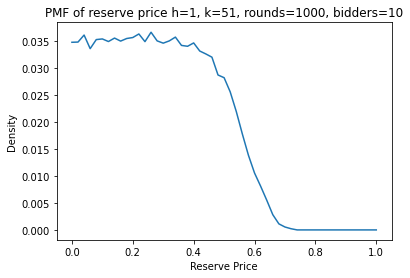

Text(0, 0.5, 'Revenue')

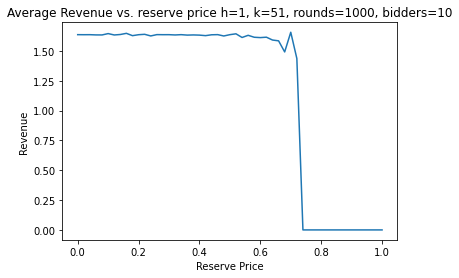

In [9]:
price_probabilities = normalize(price_count)
discretized_prices = np.linspace(0, h, num=discretization)
plt.plot(discretized_prices, price_probabilities)
plt.title("Empirical PMF of reserve price    "
         f"h={1}, k={discretization}, rounds={rounds}, bidders={bidders}")
plt.xlabel("Reserve Price")
plt.ylabel("Density")
plt.show()
plt.plot(discretized_prices, revenue_total)
plt.title("Average Revenue vs. reserve price    "
         f"h={1}, k={discretization}, rounds={rounds}, bidders={bidders}")
plt.xlabel("Reserve Price")
plt.ylabel("Revenue")
plt.show()

In [ ]:
min_n = 3
max_n = 10
# range is [min_n, max_n)
price_count_nth = np.zeros((7, discretization))
revenue_nth = np.zeros((7, discretization))

for i in range(iterations):
    for n in range(min_n, max_n):
        bids = random.rand(bidders, rounds)
        reserve = OnlineReserve(learning_rate, discretization, h=h)
        prices, revenue, regret = reserve.run_auctions(bids, n=n)

        # Take only the latter half
        for r in range(rounds//2, rounds):
            # This could be cleaner
            idx = int(round(prices[r] * (discretization - 1)))
            price_count_nth[n - min_n, idx] += 1
            revenue_nth[n - min_n, idx] += revenue[r]
revenue_nth = np.where(price_count_nth > 0, revenue_nth / price_count_nth, price_count_nth)

In [ ]:
price_probabilities_nth = np.empty_like(price_count_nth)
for i in range(price_count_nth.shape[0]):
    price_probabilities_nth[i, :] = normalize(price_count_nth[i, :])

discretized_prices = np.linspace(0, h, num=discretization)
for n in range(min_n, max_n):
    plt.plot(discretized_prices, price_probabilities_nth[n - min_n, :], label=f"n={n}")
plt.title("Empirical PMF of reserve price.   "
         f"h={1}, k={discretization}, rounds={rounds}, bidders={bidders}")
plt.legend()
plt.xlabel("Reserve Price")
plt.ylabel("Probability Mass")
plt.show()

for n in range(min_n, max_n):
    plt.plot(discretized_prices, revenue_nth[n - min_n, :], label=f"n={n}")
plt.title("Average Revenue vs. reserve price.   "
         f"h={1}, k={discretization}, rounds={rounds}, bidders={bidders}")
plt.legend()
plt.xlabel("Reserve Price")
plt.ylabel("Revenue")
plt.show()

In [ ]:
n_range = np.arange(3, 10)
price_count_rand = np.zeros(discretization)
revenue_rand = np.zeros(discretization)

for i in range(iterations):
    bids = random.rand(bidders, rounds)
    reserve = OnlineReserve(learning_rate, discretization, h=h)
    prices, revenue, regret = reserve.run_auctions(bids, n=n_range)
    
    # Take only the latter half
    for r in range(rounds//2, rounds):
        # This could be cleaner
        idx = int(round(prices[r] * (discretization - 1)))
        price_count_rand[idx] += 1
        revenue_rand[idx] += revenue[r]
        
revenue_rand = np.where(price_count_rand > 0, revenue_rand / price_count_rand, price_count_rand)

In [ ]:
price_probabilities_rand = normalize(price_count_rand)
discretized_prices = np.linspace(0, h, num=discretization)
plt.plot(discretized_prices, price_probabilities_rand)
plt.title("Empirical PMF of reserve price with randomized n from 3-9.   "
         f"h={1}, k={discretization}, rounds={rounds}, bidders={bidders}")
plt.xlabel("Reserve Price")
plt.ylabel("Probability Mass")
plt.show()

plt.plot(discretized_prices, revenue_rand)
plt.title("Average Revenue vs. reserve price with randomized n from 3-9   "
         f"h={1}, k={discretization}, rounds={rounds}, bidders={bidders}")
plt.xlabel("Reserve Price")
plt.ylabel("Revenue")
plt.show()